In [44]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial import distance

In [45]:
iris=datasets.load_iris()
x=iris.data
y=iris.target
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


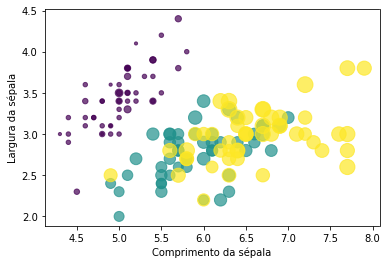

In [46]:
caracteristica = iris.data.T

plt.scatter(caracteristica[0], caracteristica[1], alpha=0.7,
            s=100*caracteristica[3], c=iris.target, cmap='viridis')
plt.xlabel('Comprimento da sépala')
plt.ylabel('Largura da sépala');

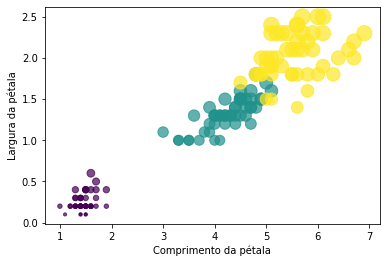

In [47]:
plt.scatter(caracteristica[2], caracteristica[3], alpha=0.7,
            s=100*caracteristica[3], c=iris.target, cmap='viridis')
plt.xlabel('Comprimento da pétala')
plt.ylabel('Largura da pétala');

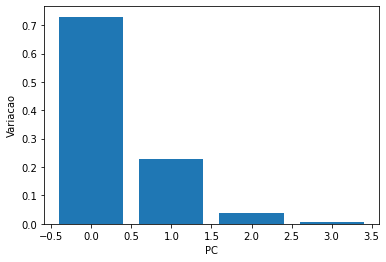

In [48]:
#Normalizando 
normaliza = iris["data"]
normaliza = StandardScaler().fit_transform(normaliza)
numComponents = 4
aplicaPCA = PCA(n_components=numComponents)
componentsPC = aplicaPCA.fit_transform(normaliza)
variacaoPCA = aplicaPCA.explained_variance_ratio_
plt.bar(x=range(numComponents) , height=variacaoPCA)
plt.ylabel("Variacao")
plt.xlabel("PC")
plt.show()

In [49]:
def euc(a, b):
    return distance.euclidean(a, b)

class KNN: 

    def fit(self, treinoPet, treinoSep):

        self.treinoPet = treinoPet
        self.treinoSep = treinoSep

    def predicao(self, testePet):

        predicoes = []
        
        for row in testePet:
            label = self.MaisProximo(row)
            predicoes.append(label)
        return predicoes
    def MaisProximo(self, row):
        melhorDist = euc(row, self.treinoPet[0])
        melhorIndice = 0
        for i in range(1, len(self.treinoPet)):
            dist = euc(row, self.treinoPet[i])
            if dist < melhorDist:
                melhorDist = dist
                melhorIndice = i

        return self.treinoSep[melhorIndice]

In [50]:
treinoPet, testePet, treinoSep, testeSep = train_test_split(x, y, test_size = .5)


classificacao = KNN()

classificacao.fit(treinoPet, treinoSep)
predicoes = classificacao.predicao(testePet)
print("Acurácia da classificação:", accuracy_score(testeSep, predicoes))

Acurácia da classificação: 0.96
